In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Data
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
sample = pd.read_csv('sample_submission.csv')

In [3]:
import warnings
warnings.filterwarnings('ignore')

### EDA

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [8]:
sample.Loan_Status.value_counts()

Loan_Status
N    367
Name: count, dtype: int64

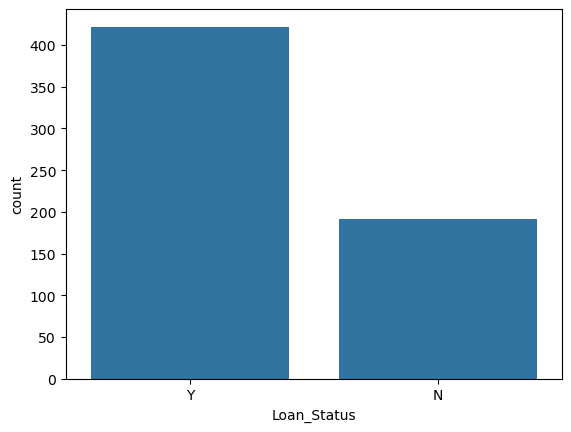

In [9]:
ax = sns.countplot(x='Loan_Status', data=train)

In [10]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

[Text(0, 0, '422'), Text(0, 0, '192')]

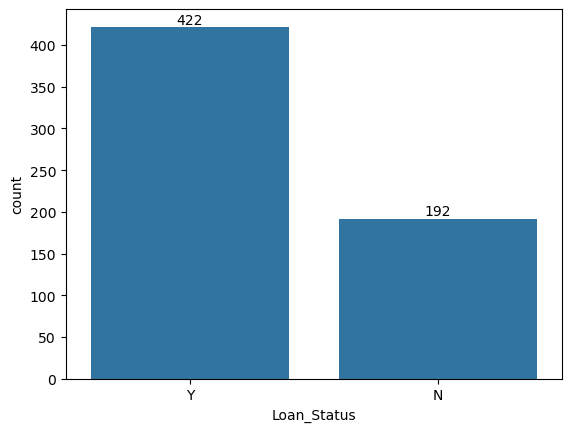

In [11]:
#Exploratory Data Analysis
ax = sns.countplot(x='Loan_Status', data=train)
ax.bar_label(ax.containers[0])

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

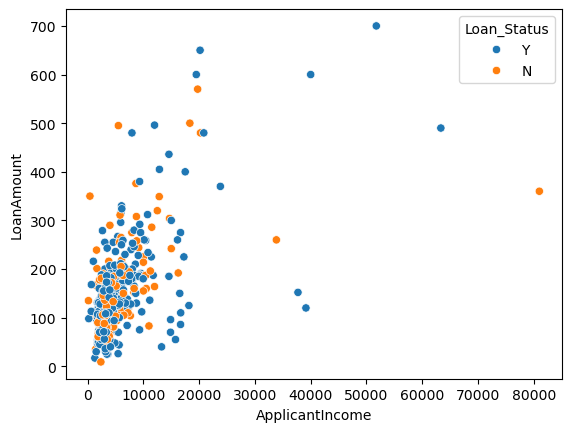

In [12]:
sns.scatterplot(x = 'ApplicantIncome', y = 'LoanAmount', hue = 'Loan_Status', data = train )

<Axes: xlabel='ApplicantIncome', ylabel='Credit_History'>

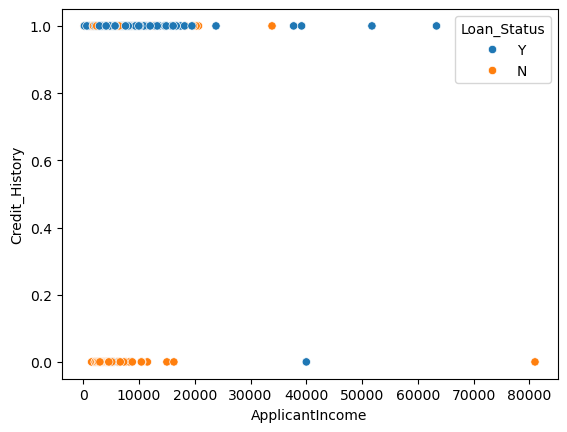

In [13]:
sns.scatterplot(x = 'ApplicantIncome', y = 'Credit_History', hue = 'Loan_Status', data = train )

<Axes: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

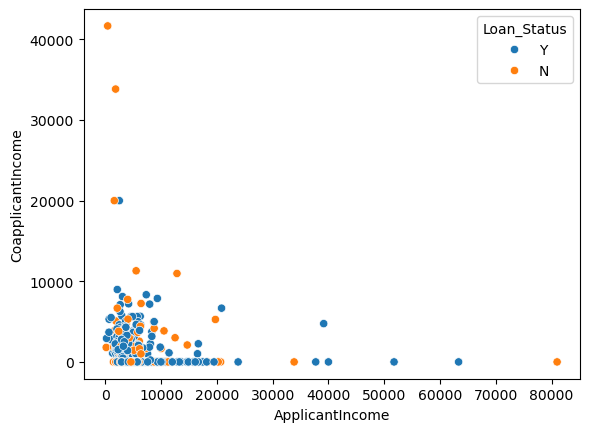

In [14]:
sns.scatterplot(x = 'ApplicantIncome', y = 'CoapplicantIncome', hue = 'Loan_Status', data = train )

<Axes: xlabel='LoanAmount', ylabel='Self_Employed'>

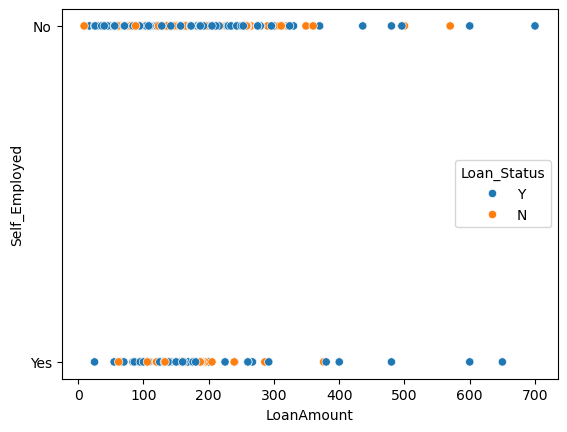

In [15]:
sns.scatterplot(x = 'LoanAmount', y = 'Self_Employed', hue = 'Loan_Status', data = train )

In [16]:
train.groupby('Education')['Loan_Status'].value_counts(normalize = True)

Education     Loan_Status
Graduate      Y              0.708333
              N              0.291667
Not Graduate  Y              0.611940
              N              0.388060
Name: proportion, dtype: float64

In [17]:
train.groupby('Self_Employed')['Loan_Status'].value_counts(normalize = True).reset_index()

,Self_Employed,Loan_Status,proportion
0,No,Y,0.686000
1,No,N,0.314000
2,Yes,Y,0.682927
3,Yes,N,0.317073


In [18]:
train.groupby('Married')['Loan_Status'].value_counts(normalize = True).reset_index()

,Married,Loan_Status,proportion
0,No,Y,0.629108
1,No,N,0.370892
2,Yes,Y,0.716080
3,Yes,N,0.283920


In [19]:
train.groupby(['Education', 'Married'])['Loan_Status'].value_counts(normalize = True).reset_index()

,Education,Married,Loan_Status,proportion
0,Graduate,No,Y,0.630952
1,Graduate,No,N,0.369048
2,Graduate,Yes,Y,0.747573
3,Graduate,Yes,N,0.252427
4,Not Graduate,No,Y,0.622222
5,Not Graduate,No,N,0.377778
6,Not Graduate,Yes,Y,0.606742
7,Not Graduate,Yes,N,0.393258


In [20]:
train.groupby(['Education', 'Married','Property_Area'])['Loan_Status'].value_counts(normalize = True).reset_index()

,Education,Married,Property_Area,Loan_Status,proportion
0,Graduate,No,Rural,Y,0.608696
1,Graduate,No,Rural,N,0.391304
2,Graduate,No,Semiurban,Y,0.666667
3,Graduate,No,Semiurban,N,0.333333
4,Graduate,No,Urban,Y,0.610169
5,Graduate,No,Urban,N,0.389831
6,Graduate,Yes,Rural,Y,0.658824
7,Graduate,Yes,Rural,N,0.341176
8,Graduate,Yes,Semiurban,Y,0.819672
9,Graduate,Yes,Semiurban,N,0.180328


In [21]:
train.groupby(['Property_Area'])['Loan_Status'].value_counts(normalize = True).reset_index()

,Property_Area,Loan_Status,proportion
0,Rural,Y,0.614525
1,Rural,N,0.385475
2,Semiurban,Y,0.768240
3,Semiurban,N,0.231760
4,Urban,Y,0.658416
5,Urban,N,0.341584


In [22]:
train.groupby(['Dependents'])['Loan_Status'].value_counts(normalize = True).reset_index()

,Dependents,Loan_Status,proportion
0,0,Y,0.689855
1,0,N,0.310145
2,1,Y,0.647059
3,1,N,0.352941
4,2,Y,0.752475
5,2,N,0.247525
6,3+,Y,0.647059
7,3+,N,0.352941


In [23]:
train.groupby(['Property_Area'])['Loan_Status'].value_counts(normalize = True).unstack()

Loan_Status,N,Y
Property_Area,,
Rural,0.385475,0.614525
Semiurban,0.231760,0.768240
Urban,0.341584,0.658416


In [24]:
grouped = train.groupby(['Property_Area'])['Loan_Status'].value_counts(normalize = True).unstack()

<Axes: xlabel='Loan_Status', ylabel='Property_Area'>

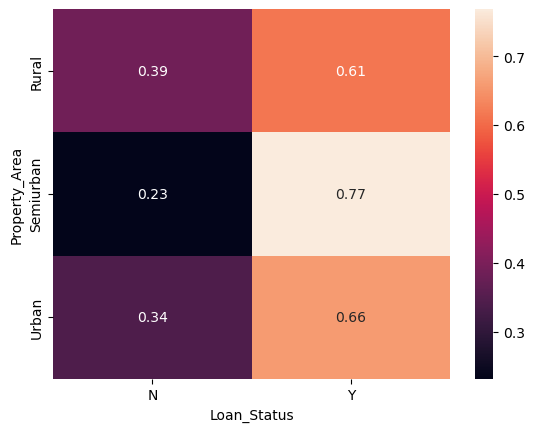

In [25]:
sns.heatmap(grouped, annot=True )  #sns.heatmap(grouped, cmap= 'coolwarm', cbar=True, annot=True )

In [26]:
grouped = train.groupby(['Education', 'Married','Property_Area'])['Loan_Status'].value_counts(normalize = True).unstack()

<Axes: xlabel='Loan_Status', ylabel='Education-Married-Property_Area'>

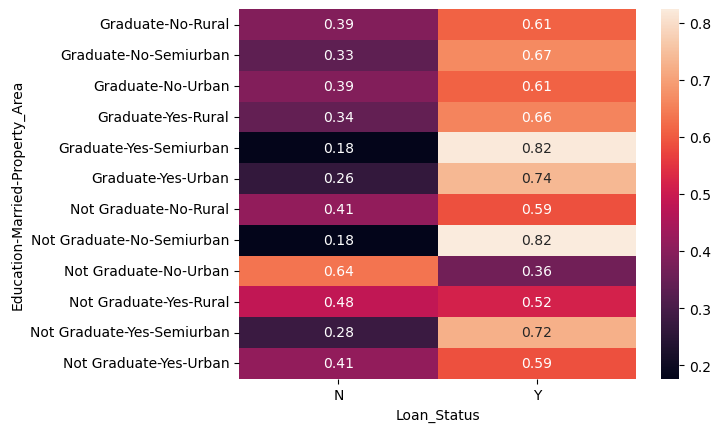

In [27]:
sns.heatmap(grouped, annot=True )  #sns.heatmap(grouped, cmap= 'coolwarm', cbar=True, annot=True )

<Axes: xlabel='Education,Married,Property_Area'>

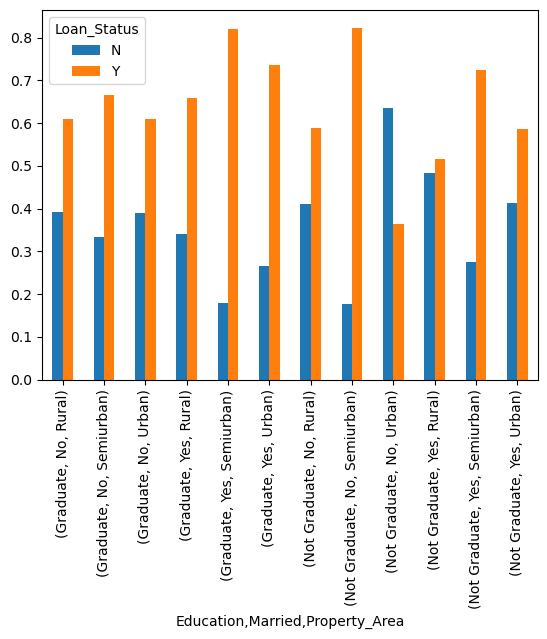

In [28]:
grouped.plot(kind = 'bar') #grouped.plot(kind = 'bar', stacked = True)

In [29]:
train['Loan_Status'].replace({'Y':1, 'N': 0}, inplace = True)

In [30]:
train.select_dtypes(include=np.number).corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<Axes: >

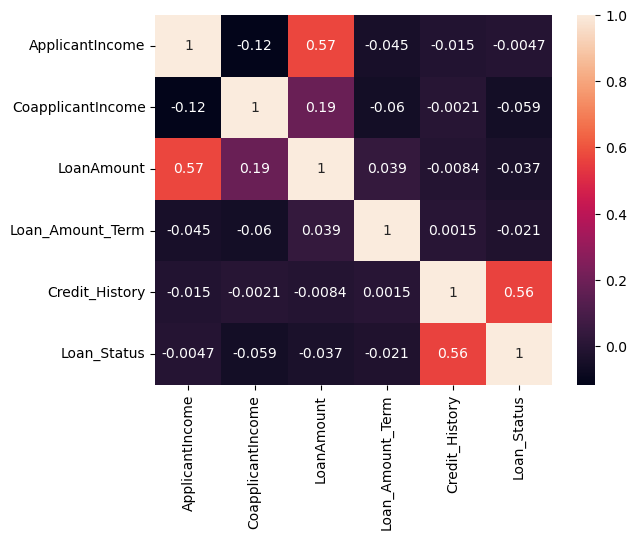

In [31]:
sns.heatmap(train.select_dtypes(include=np.number).corr(), annot = True)

### Pre-processing

In [33]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
train['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [35]:
train.select_dtypes(exclude= np.number).isna().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
dtype: int64

In [36]:
cat_var = ['Gender','Married','Dependents','Self_Employed', 'Credit_History']

for colum in cat_var:
    train[colum].fillna(train[colum].mode()[0], inplace = True)

In [37]:
train.select_dtypes(exclude= np.number).isna().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

In [38]:
train.select_dtypes(include= np.number).isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Loan_Status           0
dtype: int64

In [39]:
train[:3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1


In [40]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [41]:
train['Loan_Amount_Term'].median()

360.0

In [42]:
num_impute = ['LoanAmount','Loan_Amount_Term']

for colum in num_impute:
    train[colum].fillna(train[colum].median(), inplace = True)

In [43]:
train.select_dtypes(include= np.number).isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64

In [44]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [45]:
train[:4]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1


In [46]:
train['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [47]:
train.replace({'Dependents': {'3+': 3}}, inplace = True)

In [48]:
train['Dependents'].value_counts()

Dependents
0    360
1    102
2    101
3     51
Name: count, dtype: int64

In [49]:
train.replace({'Loan_Status': {'Y': 1, 'N': 0}}, inplace=True)

In [50]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [51]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### Modeling - Pipeline

In [53]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score

In [54]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [55]:
train.shape

(614, 13)

In [56]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [57]:
train['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [58]:
train.replace({'Loan_Status': {'N':0, 'Y':1}}, inplace=True)

In [59]:
X = train.drop(columns=['Loan_ID','Loan_Status'])

In [60]:
X[:4]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban


In [61]:
y = train['Loan_Status']

In [62]:
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size = 0.3, random_state = 2)

In [63]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [64]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 
                        'Property_Area']
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [65]:
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder())
])

In [66]:
numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy="median")),
    ('scale', StandardScaler())
])

In [67]:
preprocessor = ColumnTransformer(transformers = [
    ('cat_transform',categorical_transformer, categorical_features),
    ('num_transform',numerical_transformer, numerical_features),
])

In [68]:
model_preprocess_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logistic_model', LogisticRegression())
])

In [69]:
model_preprocess_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area']),
                                                 ('num_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term'])])),
                ('logistic_model', LogisticRegression())])

In [70]:
model_preprocess_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area']),
                                                 ('num_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term'])])),
                ('logistic_model', LogisticRegression())])

In [71]:
train_pred = model_preprocess_pipeline.predict(X_train)

In [72]:
train_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,

In [73]:
model_preprocess_pipeline.predict_proba(X_train)

array([[0.1569643 , 0.8430357 ],
       [0.2528108 , 0.7471892 ],
       [0.11934059, 0.88065941],
       [0.1989611 , 0.8010389 ],
       [0.15189364, 0.84810636],
       [0.12332249, 0.87667751],
       [0.23573615, 0.76426385],
       [0.31100316, 0.68899684],
       [0.89887401, 0.10112599],
       [0.8888333 , 0.1111667 ],
       [0.24216487, 0.75783513],
       [0.89260482, 0.10739518],
       [0.86050105, 0.13949895],
       [0.13301521, 0.86698479],
       [0.13567157, 0.86432843],
       [0.31052258, 0.68947742],
       [0.20543061, 0.79456939],
       [0.27971574, 0.72028426],
       [0.31130253, 0.68869747],
       [0.14982497, 0.85017503],
       [0.10053993, 0.89946007],
       [0.09246832, 0.90753168],
       [0.91076193, 0.08923807],
       [0.09382749, 0.90617251],
       [0.2357717 , 0.7642283 ],
       [0.27385127, 0.72614873],
       [0.15521865, 0.84478135],
       [0.24209873, 0.75790127],
       [0.26950732, 0.73049268],
       [0.18639066, 0.81360934],
       [0.

In [74]:
# np.where(model_preprocess_pipeline.predict_proba(X_train)[:,1]>0.8,1,0)

In [75]:
val_pred = model_preprocess_pipeline.predict(X_val)

In [76]:
confusion_matrix(y_train, train_pred)

array([[ 61,  73],
       [  6, 289]], dtype=int64)

In [77]:
confusion_matrix(y_val, val_pred)

array([[ 23,  35],
       [  3, 124]], dtype=int64)

In [78]:
accuracy_score(y_train, train_pred)

0.8158508158508159

In [79]:
accuracy_score(y_val, val_pred)

0.7945945945945946

In [80]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.91      0.46      0.61       134
           1       0.80      0.98      0.88       295

    accuracy                           0.82       429
   macro avg       0.85      0.72      0.74       429
weighted avg       0.83      0.82      0.79       429



In [81]:
print(classification_report(y_val, val_pred))

              precision    recall  f1-score   support

           0       0.88      0.40      0.55        58
           1       0.78      0.98      0.87       127

    accuracy                           0.79       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.81      0.79      0.77       185



In [82]:
actual_test = test.drop(columns=['Loan_ID'])

In [83]:
hackathon_pred = model_preprocess_pipeline.predict(actual_test)

In [84]:
hackathon_pred[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [85]:
sample

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [86]:
sample['Loan_Status'] = hackathon_pred

In [87]:
sample

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [88]:
sample['Loan_Status'].replace({1:'Y', 0: 'N'}, inplace = True)

In [89]:
# sample.to_csv('Logistic_pred_hackathon.csv', index= False)

### Polynomial features

In [91]:
# Polynomial Features

model_preprocess_polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('logistic_model', LogisticRegression())
])

In [92]:
model_preprocess_polynomial_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area']),
                                                 ('num_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term'])])),
                ('polynomial', PolynomialFeatures()),
                ('logistic_model', LogisticRegression())])

In [93]:
train_poly_pred = model_preprocess_polynomial_pipeline.predict(X_train)
val_poly_pred = model_preprocess_polynomial_pipeline.predict(X_val)

In [94]:
accuracy_score(y_train, train_poly_pred)

0.8554778554778555

In [95]:
accuracy_score(y_val, val_poly_pred)

0.7945945945945946

In [96]:
hackathon_pred_poly = model_preprocess_polynomial_pipeline.predict(actual_test)

In [97]:
hackathon_pred_poly

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,

In [98]:
sample['Loan_Status'] = hackathon_pred_poly

In [99]:
sample['Loan_Status'].replace({1:'Y', 0: 'N'}, inplace = True)

In [100]:
sample[:4]

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y


In [101]:
# sample.to_csv('Logistic_poly_pipeline.csv', index= False)

### Lasso Regularization

In [103]:

model_preprocess_polynomial_lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('lasso_model', LogisticRegression(penalty='l1', solver = 'liblinear', C = 0.05 ))
])

In [104]:
model_preprocess_polynomial_lasso_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area']),
                                                 ('num_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term'])])),
                ('polynomial', PolynomialFeatures()),
                ('lasso_model',
                 LogisticRegression(C=0.05, penalty='l1', solver='liblinear'))])

In [105]:
train_poly_lasso_pred = model_preprocess_polynomial_lasso_pipeline.predict(X_train)
val_poly_lasso_pred = model_preprocess_polynomial_lasso_pipeline.predict(X_val)

In [106]:
train_poly_lasso_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,

In [107]:
accuracy_score(y_train, train_poly_lasso_pred)

0.8158508158508159

In [108]:
accuracy_score(y_val, val_poly_lasso_pred)

0.8

In [109]:
actual_poly_lasso_pred = model_preprocess_polynomial_lasso_pipeline.predict(actual_test)

In [110]:
sample['Loan_Status'] = actual_poly_lasso_pred

In [111]:
sample['Loan_Status'].replace({1:'Y', 0: 'N'}, inplace = True)

In [112]:
# sample.to_csv('Lasso_poly_pipeline.csv', index= False)

### Grid Search with KFold

In [114]:
kfold = KFold(n_splits=5, shuffle=True, random_state=22)

In [115]:
param_grid = {
    'lasso_model__C' : [0.001, 0.01, 0.02, 0.05, 0.1, 10, 100]
}

In [116]:
grid_search = GridSearchCV(model_preprocess_polynomial_lasso_pipeline, param_grid, cv= kfold, scoring='accuracy')

In [117]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=22, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_transform',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Dependents',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Credit_History',
                                                                          'Property_Area']),
                                                                        ('n...
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term'])])),
                                       ('polynomial', PolynomialFeatures()),
                                       ('lasso_model',
                                        LogisticRegression(C=0.05, penalty='l1',
                                                           solver='liblinear'))]),
             param_grid={'lasso_model__C': [0.001, 0.01, 0.02, 0.05, 0.1, 10,
                                            100]},
             scoring='accuracy')

In [118]:
grid_search.best_params_

{'lasso_model__C': 0.1}

In [119]:
grid_search.best_estimator_.predict(actual_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,